Chennai Surface Temperature Forecasting

About Dataset

This dataset contains time series data of average surface temperatures of major cities worldwide from the year 1796 upto 2013. This data was taken from Berkeley Earth Data page: http://berkeleyearth.org/data/.

Objective

The objective of this project is to analyse trends in Chennai's surface temperature data and build a forecasting model for the same


Cleaning the Data

Importing Common Data Handling and processing Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
raw_data = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
raw_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


Extracting Chennai's Data

In [ ]:
chennai_data = raw_data[raw_data.City=='Madras']
chennai_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
135716,1796-01-01,24.252,2.433,Madras,India,13.66N,80.09E
135717,1796-02-01,25.579,1.423,Madras,India,13.66N,80.09E
135718,1796-03-01,27.196,2.591,Madras,India,13.66N,80.09E
135719,1796-04-01,30.168,1.846,Madras,India,13.66N,80.09E
135720,1796-05-01,32.682,1.263,Madras,India,13.66N,80.09E


In [ ]:
raw_data.shape,chennai_data.shape

((239177, 7), (2613, 7))

Setting Date as Index

In [ ]:
data = chennai_data.copy()

In [ ]:
data['Date'] = pd.to_datetime(data['dt'])

In [ ]:
data.set_index(data['Date'],inplace=True)
data.index

DatetimeIndex(['1796-01-01', '1796-02-01', '1796-03-01', '1796-04-01',
               '1796-05-01', '1796-06-01', '1796-07-01', '1796-08-01',
               '1796-09-01', '1796-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=2613, freq=None)

In [ ]:
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Date
Date,,,,,,,,
1796-01-01,1796-01-01,24.252,2.433,Madras,India,13.66N,80.09E,1796-01-01
1796-02-01,1796-02-01,25.579,1.423,Madras,India,13.66N,80.09E,1796-02-01
1796-03-01,1796-03-01,27.196,2.591,Madras,India,13.66N,80.09E,1796-03-01
1796-04-01,1796-04-01,30.168,1.846,Madras,India,13.66N,80.09E,1796-04-01
1796-05-01,1796-05-01,32.682,1.263,Madras,India,13.66N,80.09E,1796-05-01


Dropping Unnecessary Columns:

In [ ]:
cols = ['Date','dt','AverageTemperatureUncertainty','City','Country','Latitude','Longitude']
data.drop(cols,axis=1,inplace=True)
data.head()

,AverageTemperature
Date,
1796-01-01,24.252
1796-02-01,25.579
1796-03-01,27.196
1796-04-01,30.168
1796-05-01,32.682


Extracting Reliable Data

Prior to the 1970s, temperature readings were taken manually using mercury thermometers where any variation in the visit time impacted measurements. Therefore, we will only use data starting from the 1970s and disregard earlier data as it may not be reliable.

In [ ]:
data = data['1970':'2012']
data.head()

,AverageTemperature
Date,
1970-01-01,24.745
1970-02-01,26.320
1970-03-01,28.833
1970-04-01,30.676
1970-05-01,32.785


In [ ]:
data.shape

(516, 1)

Checking for Null values

In [ ]:
Total  = data.isnull().sum().sort_values(ascending=False)
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total,Percent],axis=1,keys =['Total','Percentage of missing values'])
missing_data


,Total,Percentage of missing values
AverageTemperature,0,0.0


Exploratory Data Analysis

In [ ]:
# importing Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns

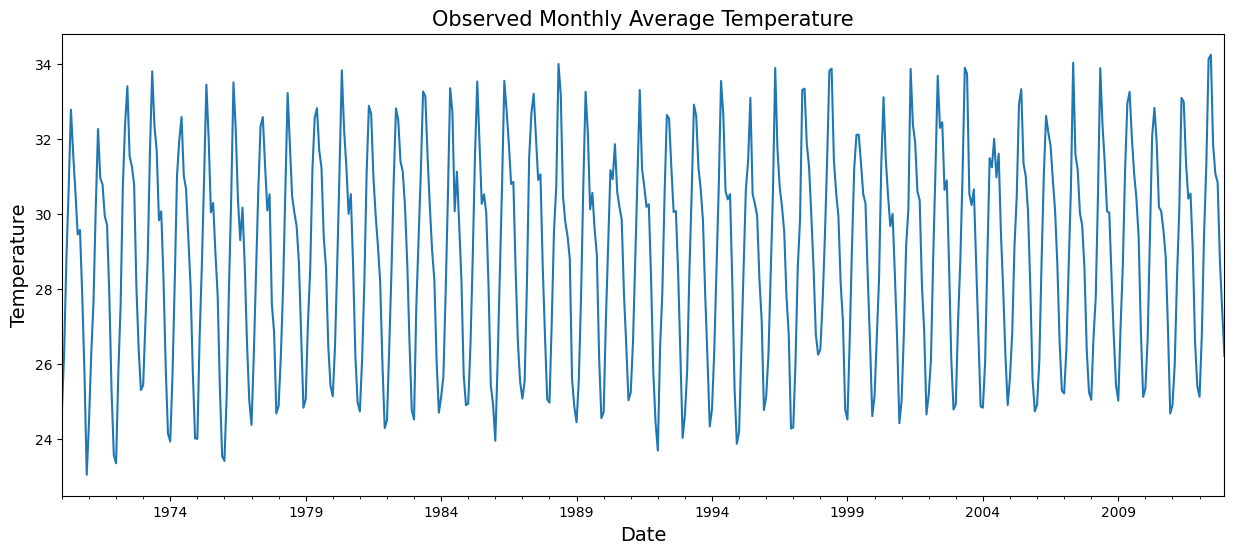

In [ ]:
# Visualising the Surface Temperature Data
data.plot(figsize=(15,6),legend = None)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Temperature',fontsize=14)
plt.title('Observed Monthly Average Temperature',fontsize=15)
plt.show()


Visualising Moving Average of the Surface Temperature

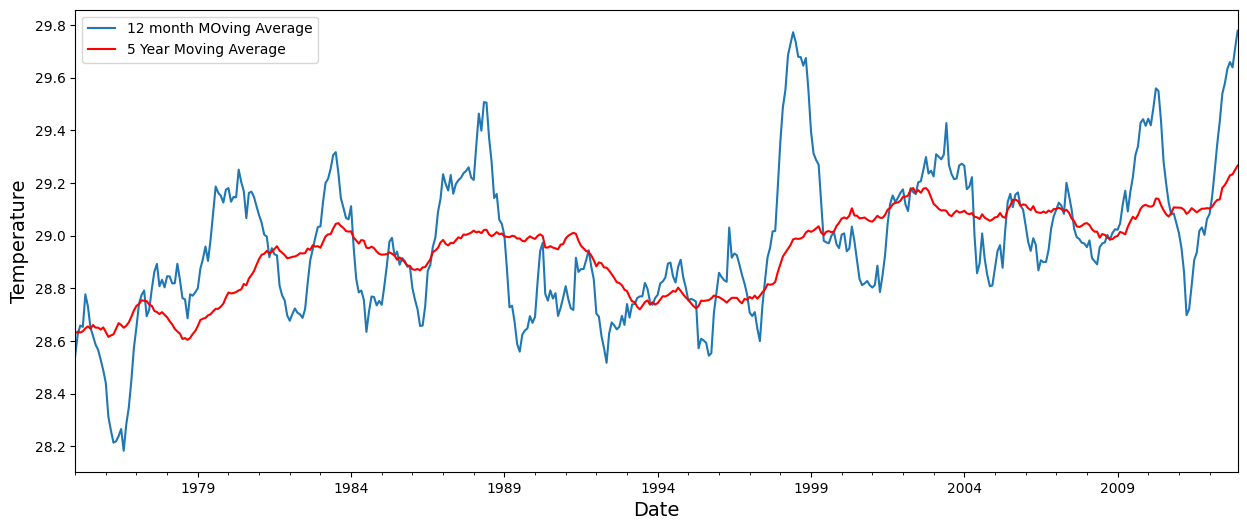

In [ ]:
yearly = data['AverageTemperature'].rolling(window = 12).mean()
fiveyearly = data['AverageTemperature'].rolling(window=60).mean()

MAax = yearly['1975':].plot(figsize=(15,6),label = '12 month MOving Average')
fiveyearly['1975':].plot(ax=MAax ,color = 'red', label = '5 Year Moving Average')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Temperature',fontsize=14)
plt.legend()
plt.show()

Seasonal Decomposition using Moving Averages

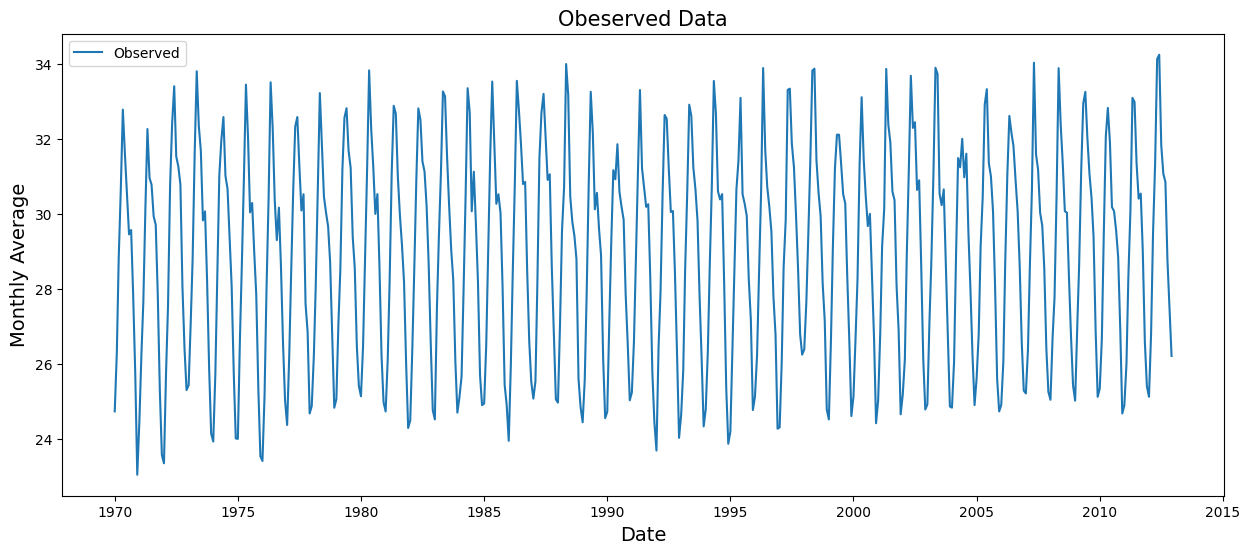

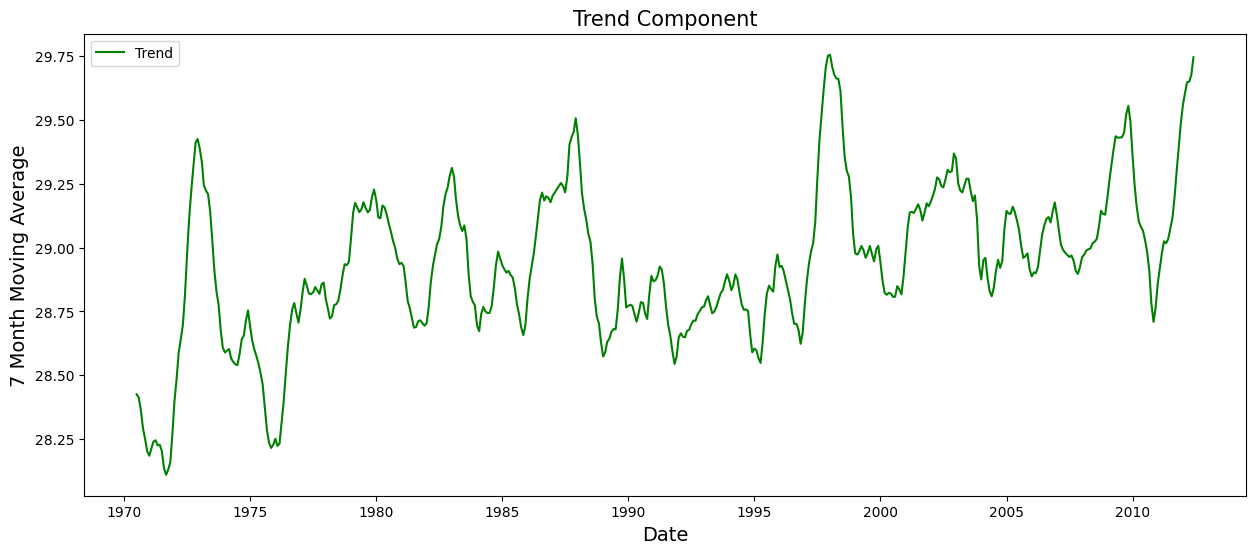

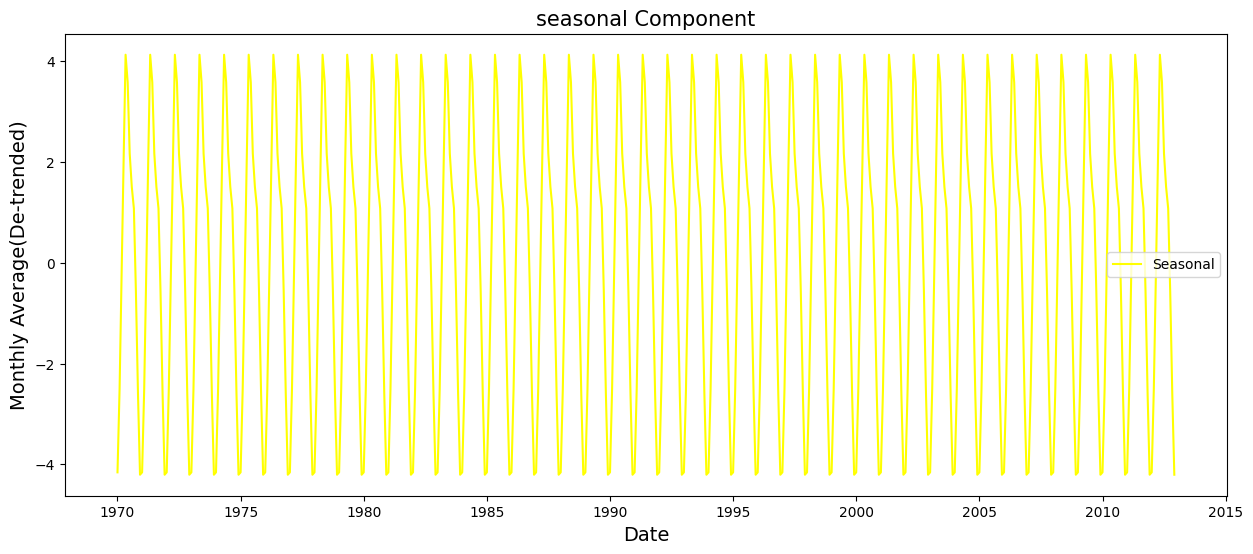

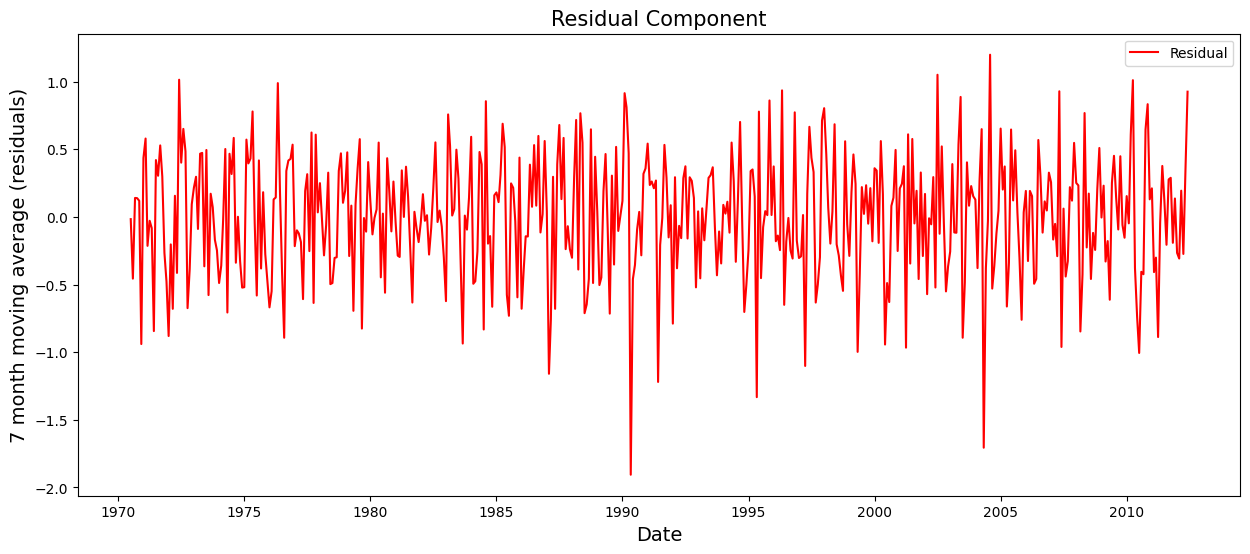

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(data)

# plotting the observed values
observed = decomposition.observed
plt.figure(figsize=(15,6))
plt.plot(observed,label='Observed')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Monthly Average',fontsize=14)
plt.legend(loc='best')
plt.title('Obeserved Data' ,fontsize=15)
plt.show()

# plotting the trend component
trend = decomposition.trend
plt.figure(figsize=(15,6))
plt.plot(trend,label='Trend',color='green')
plt.xlabel('Date',fontsize=14)
plt.ylabel('7 Month Moving Average',fontsize=14)
plt.legend(loc='best')
plt.title('Trend Component', fontsize=15)
plt.show()

# plotting seasonal component
seasonal =decomposition.seasonal
plt.figure(figsize=(15,6))
plt.plot(seasonal,label='Seasonal',color='yellow')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Monthly Average(De-trended)',fontsize=14)
plt.legend(loc='best')
plt.title('seasonal Component', fontsize=15)
plt.show()

# plotting the residual component
residual = decomposition.resid
plt.figure(figsize=(15,6))
plt.plot(residual,label='Residual',color='red')
plt.xlabel('Date',fontsize=14)
plt.ylabel('7 month moving average (residuals)',fontsize=14)
plt.legend(loc='best')
plt.title('Residual Component', fontsize=15)
plt.show()


Checking for Stationarity of data

A stationary process has the property that the mean, variance and autocorrelation structure do not change over time. We need to ensure that the time series is stationary before using it to train a model.



Augmented Dickey-Fuller (ADF) Test:

Augmented Dickey-Fuller (ADF) statistics is one of the more widely used statistical test to check whether the time series is stationary or non-stationary.

It uses an autoregressive model and optimizes an information criterion across multiple different lag values.





Null Hypothesis: Series is not stationary.

Alternate Hypothesis: Series is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
  print('Result of Dickey-Fuller Test:')
  dftest = adfuller(timeseries,autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','No. of Lags Used','Number of Observations Used'])

  for key, value in dftest[4].items():
    dfoutput[f'Critical Value {key} ']=value
  print(dfoutput)

adf_test(data)


Result of Dickey-Fuller Test:
Test Statistic                  -5.304089
p-value                          0.000005
No. of Lags Used                16.000000
Number of Observations Used    499.000000
Critical Value 1%               -3.443523
Critical Value 5%               -2.867350
Critical Value 10%              -2.569864
dtype: float64



The p-value is lesser than the level of significance (0.05) and hence it is strong evidence against the null hypothesis and therefore we reject the null hypothesis. This indicates that our time series data is stationary.


KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

KPSS (Kwiatkowski-Philips-Schmidt-Shin) test is a statistical test to check for stationarity of a series around a deterministic trend. KPSS test figures out if a time series is stationary around a mean or linear trend or is non-stationary due to a unit root.

Null Hypothesis: The series is trend stationary.

Alternate Hypothesis: The series is not stationary.

In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
  print('Result of KPSS Test:')
  kpsstest = kpss(timeseries, regression='c',nlags='legacy')
  kpss_output = pd.Series(kpsstest[0:3],index=['Test Statistics','p-value','No of lags Used'])

  for key,value in kpsstest[3].items():
    kpss_output[f'Critical Value {key}']=value
  print(kpss_output)

kpss_test(data)

Result of KPSS Test:
Test Statistics         0.249575
p-value                 0.100000
No of lags Used        19.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


/tmp/ipython-input-3163489903.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c',nlags='legacy')



The p-value is greater than the level of significance (0.05) and hence it is weak evidence against the null hypothesis and therefore we fail to reject the null hypothesis. This indicates that our time series is stationary.


Both ADF and KPSS tests are in agreement that the time series data is stationary.

Pre Processing

Assigning Frequency to the Time Series Data

We resample the data with 'MS' (Month Start) as the frequency. Although the data already consisted of only monthly samples, resampling it this way assigns a frequency to it. Frequency ambiguity could lead to the SARIMAX model auto-assigning the frequency which should be avoided.

In [ ]:
y = data['AverageTemperature'].resample('MS').mean()
y.head()

,AverageTemperature
Date,
1970-01-01,24.745
1970-02-01,26.320
1970-03-01,28.833
1970-04-01,30.676
1970-05-01,32.785


Creating Train and Test Split

In [ ]:
train = y[:'2009']
test = y['2010':]

#The Autoregressive Integrated Moving Average (ARIMA) Model:

Autoregressive Integrated Moving Average (ARIMA) is a model used in statistics and econometrics to measure events that happen over a period of time. The model is used to understand past data or predict future data in a series.



*   AR (Autoregression) : Model that shows a changing variable that regresses on its own lagged/prior values.
*   I (Integrated) : Differencing of raw observations to allow for the time series to become stationary
MA (Moving average) : Dependency between an observation and a residual error from a moving average model



For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.



*   p: the number of lag observations in the model; also known as the lag order.
*   d: the number of times that the raw observations are differenced; also known as the degree of differencing.


*  q: the size of the moving average window; also known as the order of the moving average.






#Seasonal Autoregressive Integrated Moving Average (SARIMA):

As we previously noticed, there's a seasonal component present in our data and therefore we'll be using Seasonal ARIMA. Seasonal ARIMA is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

There are four seasonal elements that are not part of ARIMA that must be configured; they are:


P: Seasonal autoregressive order.

D: Seasonal difference order.

Q: Seasonal moving average order.

m: The number of time steps for a single seasonal period.



Building the SARIMAX Model:


Using Auto-ARIMA to Find Optimal Values of the Hyperparameters:

The auto-ARIMA process seeks to identify the most optimal parameters for an ARIMA model, settling on a single fitted ARIMA model.

In [ ]:

# to find best p,q,d

import itertools
import statsmodels.api as sm

In [ ]:
p=q=d=range(0,3)
pdq = list(itertools.product(p,q,q))

best_aic = float("inf")
best_order = None

for order in pdq:
  try:
    model = sm.tsa.ARIMA(train,order=order).fit()
    if model.aic <best_aic:
      best_aic = model.aic
      best_order = order
  except:
    continue
print("Best ARIMA order:" , best_order,"with AIC",best_aic)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/st

Best ARIMA order: (2, 1, 2) with AIC 1323.0568982716509


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#  best parameter for sarima
p=q=d = range(0,2)
P=D=Q=range(0,2)
s=12 #yearly seasonality

best_aic = float('inf')
best_order = None
best_seasonal_order = None

for param in itertools.product(p,d,q):
  for seasonal_param in itertools.product(P,D,Q):
    try:
      model = SARIMAX(train,
                      order=param,
                      seasonal_order=(*seasonal_param,s),
                      enforce_invertibility=False,
                      enforce_stationarity=False
                      )
      result = model.fit(disp=False)
      if result.aic < best_aic :
        best_aic = result.aic
        best_order = param
        best_seasonal_order = seasonal_param
    except:
      continue
print("Best SARIMA order ",best_order)
print("Best seasonal order ",best_seasonal_order)
print("Best AIC ",best_aic)



/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best SARIMA order  (1, 0, 1)
Best seasonal order  (1, 1, 1)
Best AIC  731.8505274864308


Traing the Model


SARIMA

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train,
                                  order=(1,0,1),
                                  seasonal_order=(1,1,1,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
fitted_model = model.fit(maxiter=200,method='nm')
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                  480
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -361.002
Date:                            Wed, 03 Sep 2025   AIC                            732.003
Time:                                    04:05:03   BIC                            752.594
Sample:                                01-01-1970   HQIC                           740.116
                                     - 12-01-2009                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8865      0.043     20.639      0.000       0.802       0.971
ma.L1         -0.6692      0.070   

/usr/local/lib/python3.12/dist-packages/statsmodels/base/optimizer.py:748: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<bound method SARIMAXResults.summary of <statsmodels.tsa.statespace.sarimax.SARIMAXResults object at 0x792686f77650>>



Plotting Diagnostics of the Data:

Diagnostic plots for standardized residuals of the surface temperatures.


The plot_diagnostics function produces a 2x2 plot grid with the following plots (ordered clockwise from top left):

Standardized residuals over time

Histogram plus estimated density of standardized residuals, along with a Normal(0,1) density plotted for reference.

Normal Q-Q plot, with Normal reference line.

Correlogram

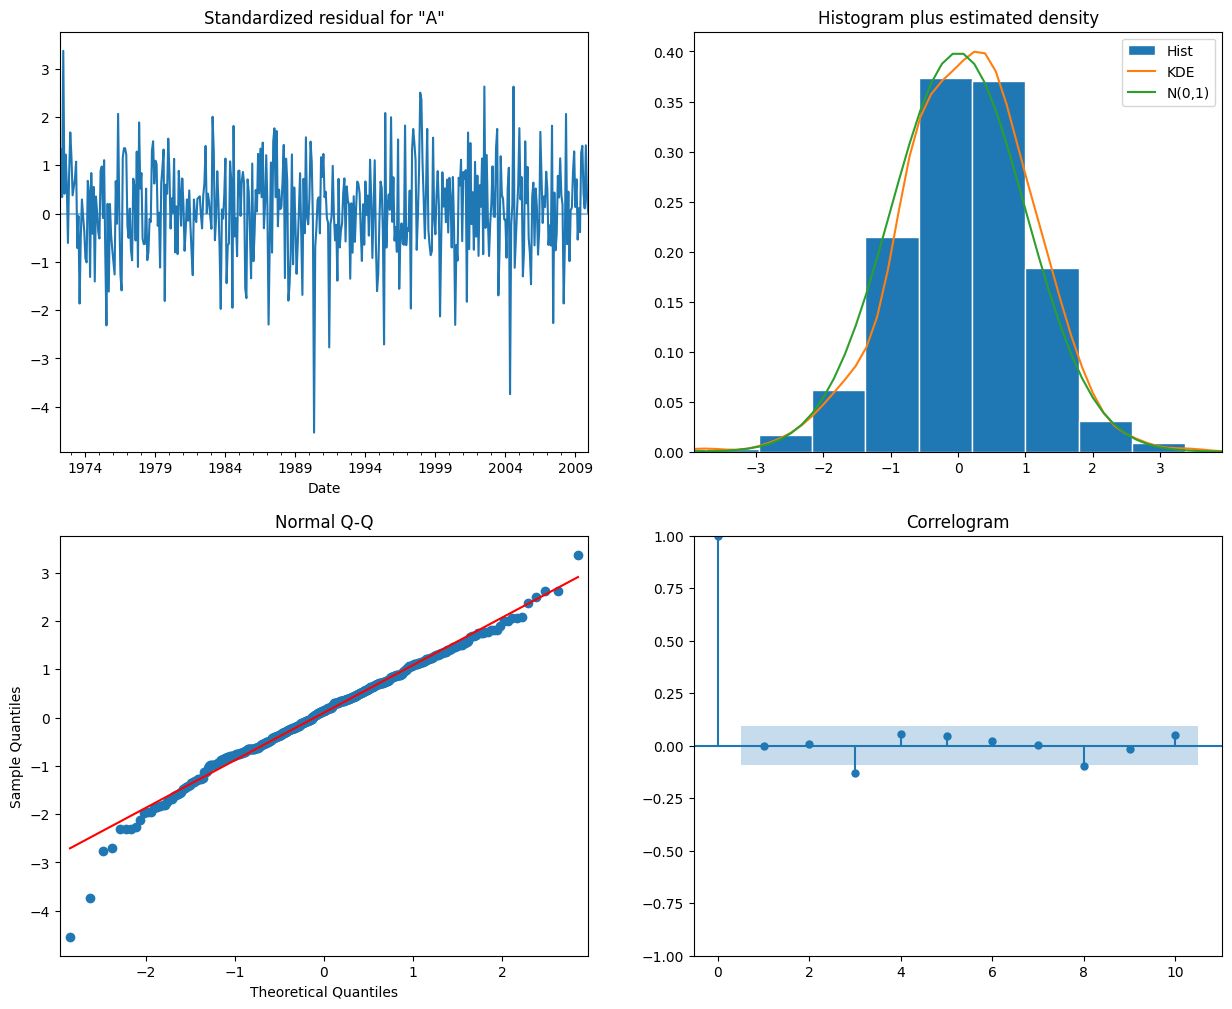

In [ ]:
fitted_model.plot_diagnostics(figsize=(15,12))
plt.show()

SARIMAX Forecasting

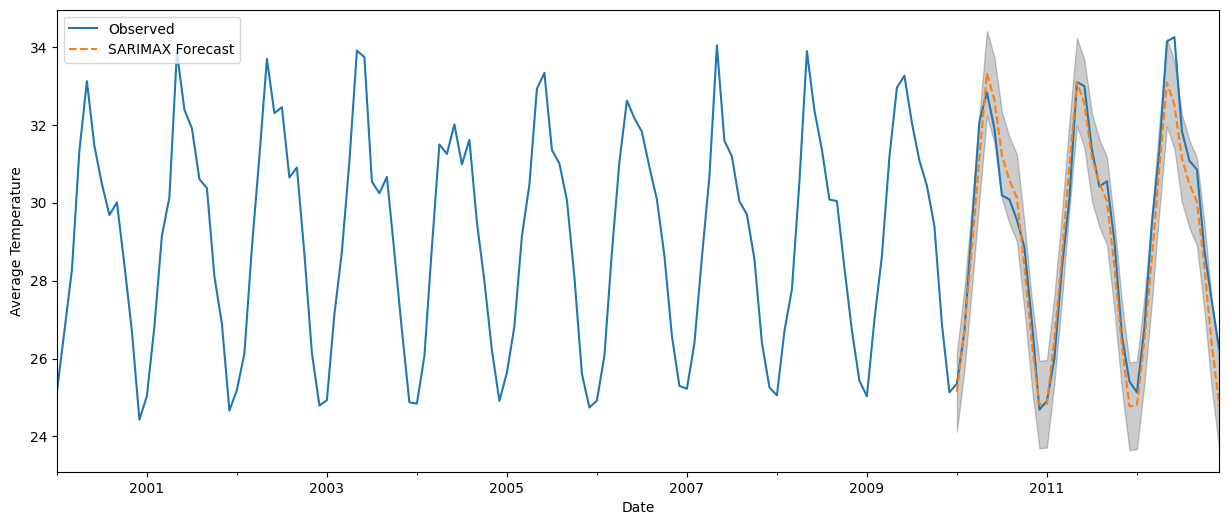

In [ ]:
# Getting the ASRIMAX forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled
pred = fitted_model.get_forecast(steps=36)
# plotting the observed and forecasted values
ax1 = y['2000':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax1,label='SARIMAX Forecast',figsize=(15,6),linestyle='dashed')

# finding the confidence interval of the forecasts
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Temperature')
plt.legend(loc='upper left')
plt.show()

Zooming In on the Forecast

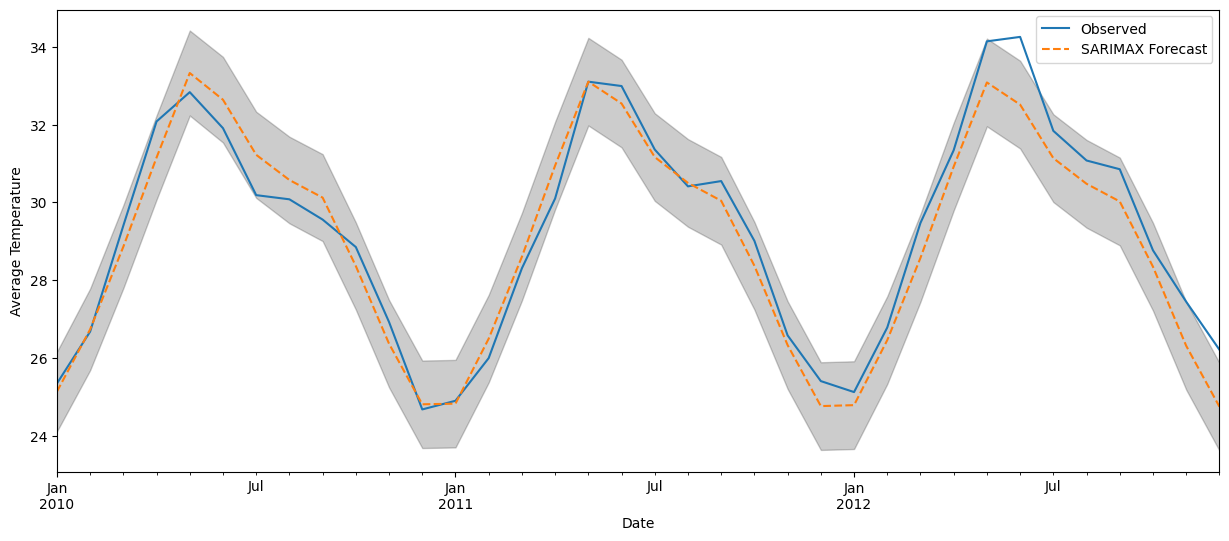

In [ ]:
# plotting the observed and forecasted values:
ax2 = y['2010':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax2,label='SARIMAX Forecast',figsize=(15,6),linestyle='dashed')

# finding the confidence interval of the forecasts
pred_ci = pred.conf_int()
ax2.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=0.2)

ax2.set_xlabel('Date')
ax2.set_ylabel('Average Temperature')
plt.legend()
plt.show()

Evaluating SARIMA Model

In [ ]:
y_forecasted_SARIMAX = pred.predicted_mean
y_truth = test
mse_SARIMAX = ((y_forecasted_SARIMAX-y_truth)**2).mean()
print('The Mean Squared Error of SARIMAX forecast is {}'.format(round(mse_SARIMAX,2)))

The Mean Squared Error of SARIMAX forecast is 0.47


In [ ]:
print("The Root Mean Squared Error of ASRIMAX forcaste is {}".format(round(np.sqrt(mse_SARIMAX),2)))

The Root Mean Squared Error of ASRIMAX forcaste is 0.69


ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train,
              order =(2,1,2),
              )
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  480
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -656.528
Date:                Wed, 03 Sep 2025   AIC                           1323.057
Time:                        04:34:06   BIC                           1343.915
Sample:                    01-01-1970   HQIC                          1331.257
                         - 12-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6908      0.013    127.089      0.000       1.665       1.717
ar.L2         -0.9571      0.012    -76.669      0.000      -0.982      -0.933
ma.L1         -1.8075      0.025    -71.042      0.0

plotting Diagnostics of the Data

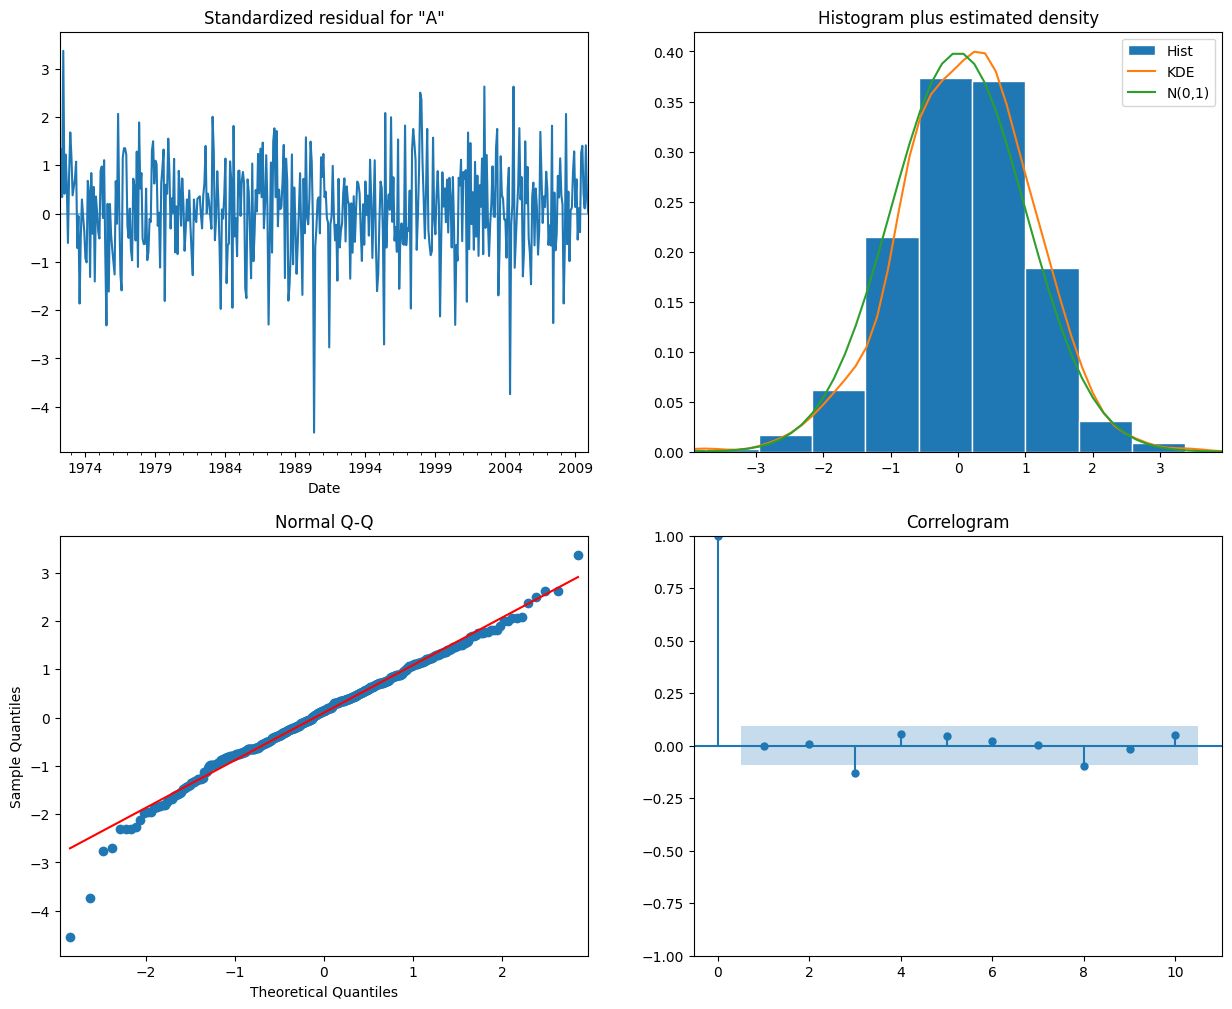

In [ ]:
fitted_model.plot_diagnostics(figsize=(15,12))
plt.show()

ARIMA Forecasting

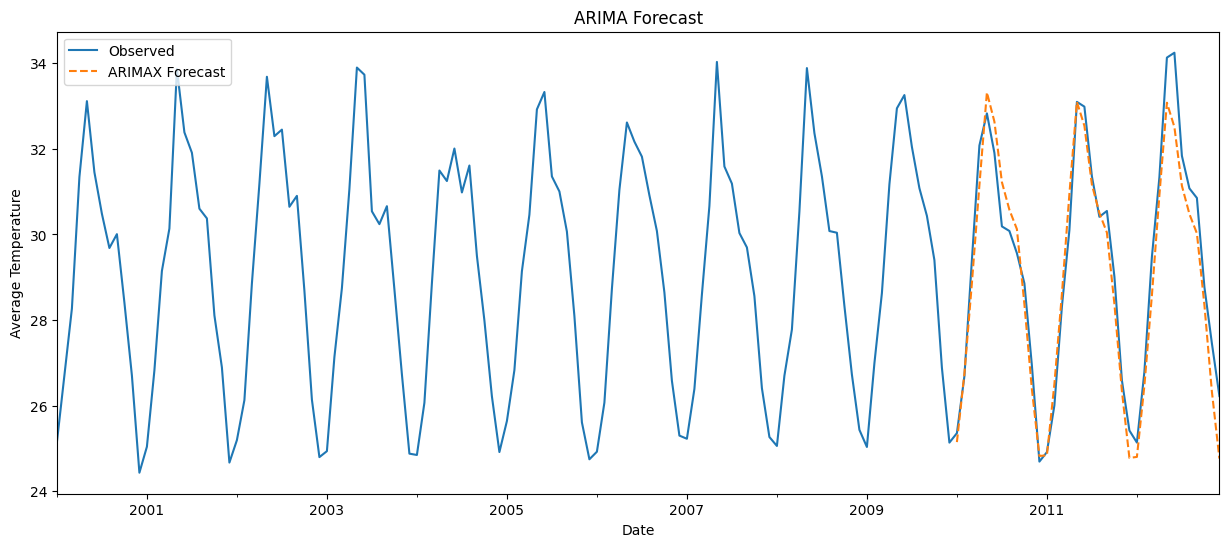

In [ ]:
#Getting the ARIMAX forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled.
pred = fitted_model.forecast(steps = 36)
#Plotting the observed and forecasted values:

plt.figure(figsize=(8,4))
ax1 = y['2000':].plot(label = 'Observed')

pred.plot(ax = ax1, label = 'ARIMA Forecast', figsize = (15, 6), linestyle = 'dashed')

plt.title("ARIMA Forecast")

plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.legend(loc='upper left')
plt.show()



Zooming In on the Forecast

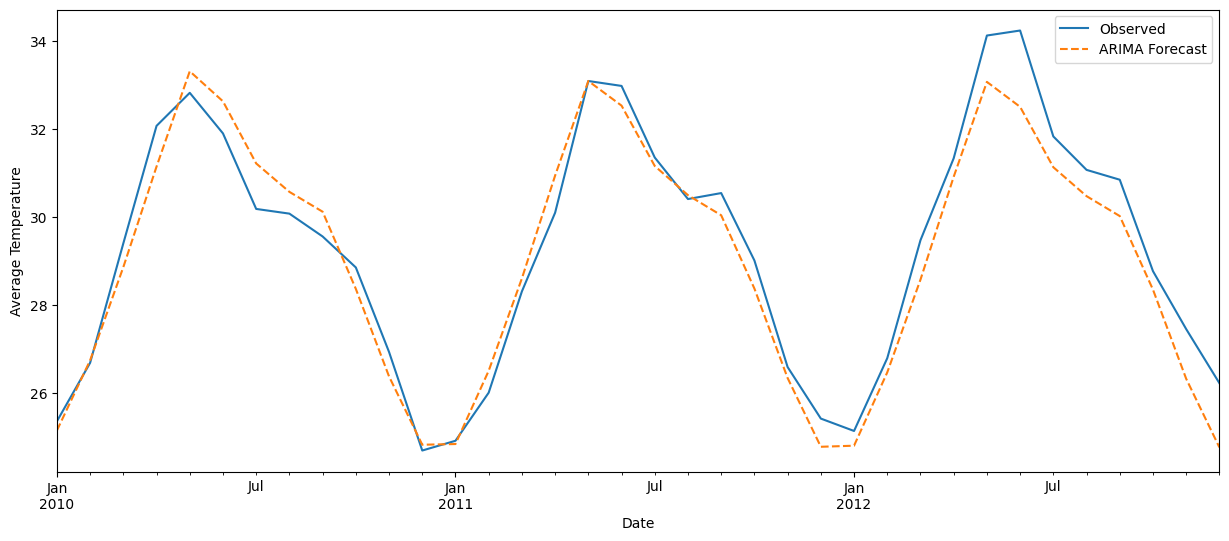

In [ ]:

#Plotting the observed and forecasted values:
ax2 = y['2010':].plot(label = 'Observed')
pred.plot(ax = ax2, label = 'ARIMA Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Temperature')
plt.legend()
plt.show()

Evaluating the ARIMA model

In [ ]:
mse_ARIMA = ((pred - test)**2).mean()
print("The Mean Squared Error of ARIMA :",round(mse_ARIMA,2))

The Mean Squared Error of ARIMA : 0.47


In [ ]:
print("The Root Mean Squared Error of ARIMA :" , round(np.sqrt(mse_ARIMA),2))

The Root Mean Squared Error of ARIMA : 0.69


What is Prophet?

Prophet is a Python/R library for forecasting time series data (like stock prices, sales, weather, etc.).

It is designed to handle:

    Trend (long-term increase or decrease)

    Seasonality (daily, weekly, yearly patterns)

    Holidays / special events (spikes or drops due to festivals, promotions, etc.)

It’s great because:

    Works well with messy business data.

    Handles missing values and outliers.

    Very little tuning needed.

Import Prophet

In [ ]:
from prophet import Prophet

In [ ]:
y.head()

,AverageTemperature
Date,
1970-01-01,24.745
1970-02-01,26.320
1970-03-01,28.833
1970-04-01,30.676
1970-05-01,32.785


Set the dataset for Prophet its columns should be ds for date column and y for value column

In [ ]:
# prophet_data = y.rename(columns={'Date':'ds','AverageTemperature':'y'})
y=y.reset_index()
train = train.reset_index()
test = test.reset_index()

In [ ]:
train.head(),test.head()

(        Date  AverageTemperature
 0 1970-01-01              24.745
 1 1970-02-01              26.320
 2 1970-03-01              28.833
 3 1970-04-01              30.676
 4 1970-05-01              32.785,
         Date  AverageTemperature
 0 2010-01-01              25.354
 1 2010-02-01              26.685
 2 2010-03-01              29.405
 3 2010-04-01              32.079
 4 2010-05-01              32.831)

In [ ]:
train.columns=["ds",'y']
test.columns=["ds","y"]


In [ ]:
train

,ds,y
0,1970-01-01,24.745
1,1970-02-01,26.320
2,1970-03-01,28.833
3,1970-04-01,30.676
4,1970-05-01,32.785
...,...,...
475,2009-08-01,31.082
476,2009-09-01,30.435
477,2009-10-01,29.400
478,2009-11-01,26.885


Building the model

In [ ]:
model = Prophet()
model.fit(train)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmludrn9v/mr72ki1v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmludrn9v/o0s1dx92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66811', 'data', 'file=/tmp/tmpmludrn9v/mr72ki1v.json', 'init=/tmp/tmpmludrn9v/o0s1dx92.json', 'output', 'file=/tmp/tmpmludrn9v/prophet_modelm8cufid0/prophet_model-20250903052146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:21:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast with Prophet

In [ ]:
future = model.make_future_dataframe(periods=36,freq='M')
forecast = model.predict(future)



/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


Plot the forecast

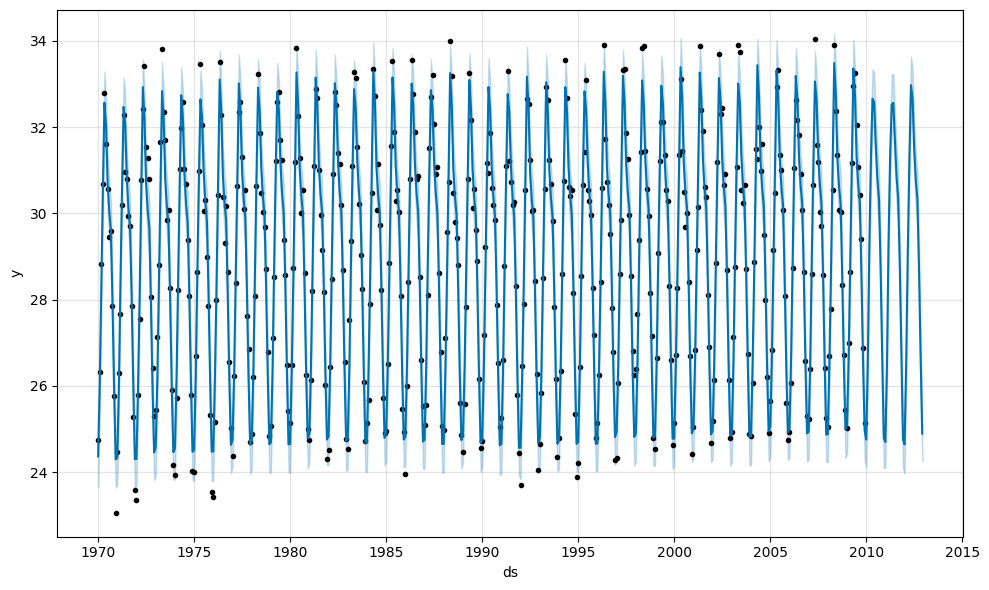

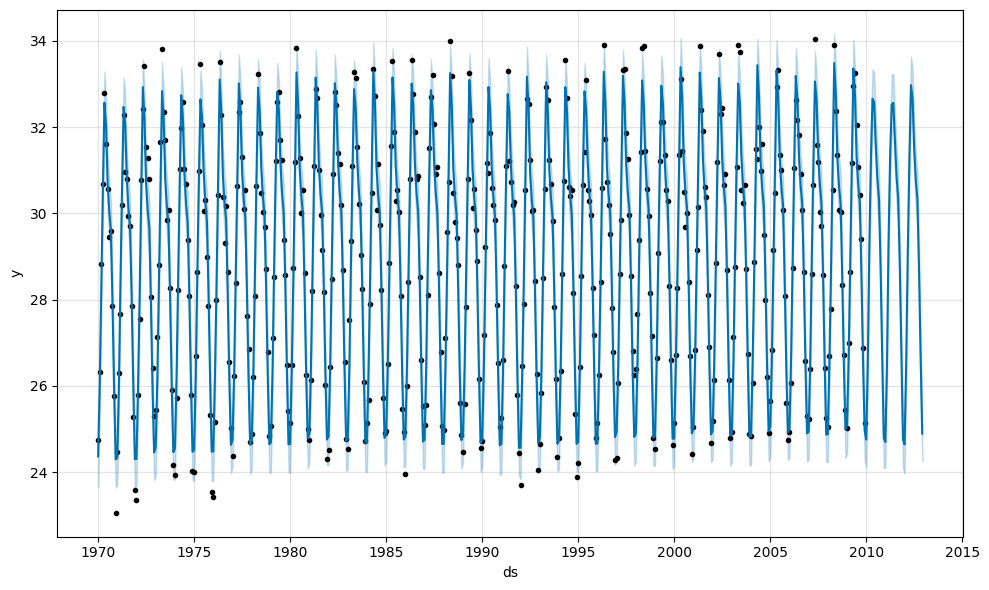

In [ ]:
model.plot(forecast)

Zoom Forecaste

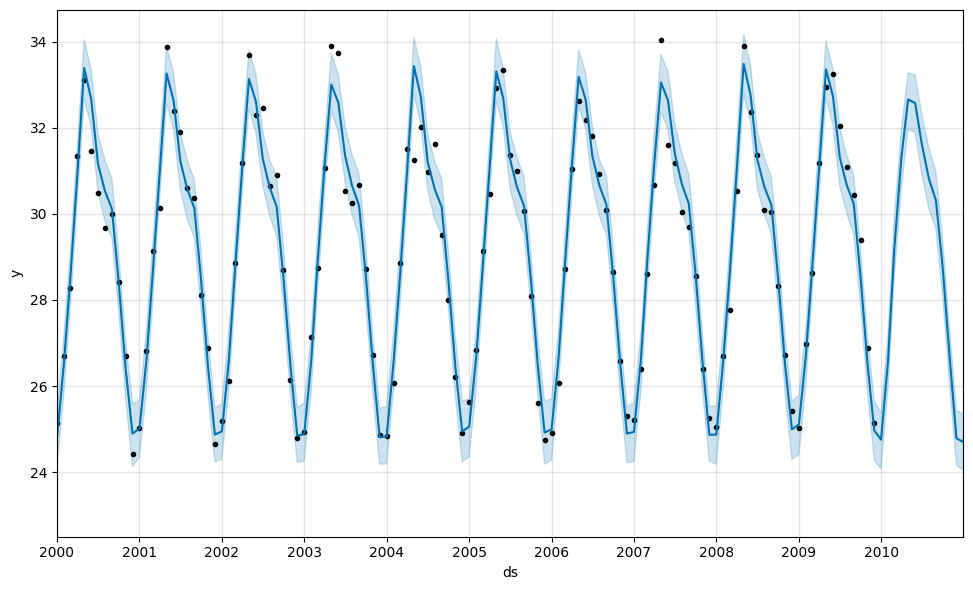

In [ ]:
from prophet.plot import plot_plotly

# Matplotlib version
fig = model.plot(forecast)
plt.xlim(pd.to_datetime("2000-01-01"), pd.to_datetime("2010-12-31"))  # zoom on x-axis
plt.show()

# Or interactive Plotly version
fig = plot_plotly(model, forecast)
fig.update_xaxes(range=["2018-01-01", "2020-12-31"])
fig.show()


In [ ]:
# -----------------------
future = model.make_future_dataframe(periods=len(test), freq="M")
forecast = model.predict(future)

# Extract only forecasted values for test period
# forecast_test = forecast.set_index("ds").loc[test["ds"], "yhat"]
forecast_test = forecast.iloc[-len(test):]

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# -----------------------
# 5. Evaluate
# -----------------------
mae = mean_absolute_error(test["y"].values, forecast_test['yhat'].values)
rmse = np.sqrt(mean_squared_error(test["y"].values, forecast_test['yhat'].values))


In [ ]:
print("Mean Absolute Error ",mae)
print("Root Mean Squared Error ",rmse)

Mean Absolute Error  0.5318304604049638
Root Mean Squared Error  0.6712505489858343
